## ZTF : check pointing history from Year 1 to figure out number of visits to S82 targets ...

In [4]:
# read in the pointing history from Year1 from E.Bellm ...
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
db = sqlite3.connect('ztf.db.Y1')

In [3]:
cursor = db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Field',), ('Summary',)]


In [4]:
fields = pd.read_sql_query("SELECT * from Field", db)
fields.to_csv('ztf_db_Y1_fields' + '.csv', index_label='index')
summary = pd.read_sql_query("SELECT * from Summary", db)
summary.to_csv('ztf_db_Y1_summary' + '.csv', index_label='index')

In [15]:
fields[:5]

,fieldID,fieldFov,fieldRA,fieldDec,fieldGL,fieldGB,fieldEL,fieldEB
0,199,10.428,0.62682,-31.45,8.4038,-79.1039,346.8701,-28.8431
1,200,10.428,8.37561,-31.45,341.8662,-84.7293,353.6762,-31.8792
2,201,10.428,16.12439,-31.45,264.1338,-84.7293,0.6874,-34.9557
3,202,10.428,23.87318,-31.45,237.5962,-79.1039,7.9705,-38.0273
4,203,10.428,31.62196,-31.45,231.1666,-72.6735,15.6010,-41.0427


In [5]:
summary = pd.read_csv('ztf_db_Y1_summary.csv')

In [6]:
pd.set_option('display.max_columns', 500)
# ignore programID = 0  (calibration),  and 3 (CalTech data only )
summary[:5]

,index,obsHistID,requestID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,visitExpTime,FWHMgeom,FWHMeff,airmass,filtSkyBright,lst,altitude,azimuth,dist2Moon,solarElong,moonRA,moonDec,moonAlt,moonAZ,moonPhase,sunAlt,sunAz,slewDist,slewTime,fiveSigmaDepth,totalRequestsTonight,metricValue,subprogram
0,0,1,391,1,836,1.047198,1.210386,r,6.749799e+06,58197.122674,78,30.0,30.0,2.426657,2.426657,1.380270,18.483952,1.830867,0.810303,5.917706,1.149398,80.376014,0.517263,0.114341,0.281603,4.665985,7.605846,-0.225966,4.859527,NaN,NaN,20.354715,2,0.410042,all_sky
1,1,2,473,1,778,1.049232,0.959058,r,6.749842e+06,58197.123169,78,30.0,30.0,2.301289,2.301289,1.263481,18.644436,1.833988,0.913201,5.563636,0.945735,74.027715,0.517363,0.114375,0.279100,4.667709,7.605846,-0.228536,4.861331,0.251329,12.805330,20.512393,2,0.509842,nightly_plane
2,2,3,555,3,509,1.249937,0.205076,r,6.749903e+06,58197.123873,78,300.0,300.0,2.296307,2.296307,1.258926,18.637915,1.838424,0.917901,4.236104,0.728044,72.799264,0.517506,0.114422,0.275543,4.670155,7.605846,-0.232188,4.863898,0.770328,30.831835,20.509735,1,0.507973,BD_Test_Field_1
3,3,4,87,1,408,1.501906,-0.046251,r,6.750219e+06,58197.127534,78,30.0,30.0,2.364055,2.364055,1.321436,20.023363,1.861493,0.858331,3.702666,0.995047,86.772968,0.518252,0.114669,0.257045,4.682826,7.605846,-0.251152,4.877318,0.354842,16.343244,21.124915,2,1.188363,all_sky
4,4,5,88,1,409,1.624583,-0.046251,r,6.750259e+06,58197.128001,78,30.0,30.0,2.311346,2.311346,1.272697,20.078602,1.864432,0.903880,3.528623,1.115971,93.794387,0.518348,0.114700,0.254687,4.684435,7.605846,-0.253566,4.879037,0.122545,10.311393,21.154875,2,1.238582,all_sky


Find out which fieldIDs are of interest  - use ZTFquery https://github.com/MickaelRigault/ztfquery 

In [10]:
cel  = Table.read('../code2/190228_Celerite_real_Jeff1_DBQSO.txt',
                 format='ascii')

6444


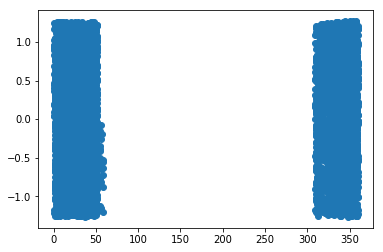

In [13]:
print(len(cel))
%matplotlib inline
plt.scatter(cel['ra'], cel['dec'])

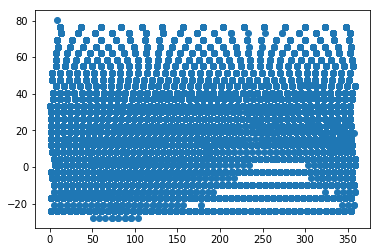

In [22]:

%matplotlib inline
N = len(summary)
plt.scatter(np.rad2deg(summary[:N]['fieldRA']), np.rad2deg(summary[:N]['fieldDec']))




In [8]:
summary['fieldRAdeg'] = np.rad2deg(summary['fieldRA'])
summary['fieldDecdeg'] = np.rad2deg(summary['fieldDec'])
m1  = (summary['fieldRAdeg'] < 59) | (309 < summary['fieldRAdeg'])
m2 = np.abs(summary['fieldDecdeg']) < 1.27
m3 = (summary['propID'] != 0 ) | (summary['propID'] != 3)
m4 = summary['filter'] =='r'
m = m1&m2&m3&m4
print(np.sum(m))


126


In [14]:
summary[m]

,index,obsHistID,requestID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,visitExpTime,FWHMgeom,FWHMeff,airmass,filtSkyBright,lst,altitude,azimuth,dist2Moon,solarElong,moonRA,moonDec,moonAlt,moonAZ,moonPhase,sunAlt,sunAz,slewDist,slewTime,fiveSigmaDepth,totalRequestsTonight,metricValue,subprogram,fieldRAdeg,fieldDecdeg
67823,67823,67824,1963,2,1491,6.136478,0.016581,r,1.869978e+07,58335.432632,216,30.0,30.0,2.212516,2.212516,1.183298,19.959454,6.157710,1.006745,3.173510,1.042501,139.860169,0.885488,0.221312,0.583408,1.689159,44.726128,-0.494860,0.720936,0.063174,48.760774,21.171964,2,1.426694,reference_building_r_1,351.59431,0.95
67824,67824,67825,1961,2,1490,6.016308,0.016581,r,1.869986e+07,58335.433545,216,30.0,30.0,2.225852,2.225852,1.195209,20.001709,6.163463,0.991182,3.404750,1.159366,145.792234,0.885659,0.221388,0.588077,1.692522,44.726128,-0.491691,0.726025,0.120153,48.899760,21.192636,2,1.396146,reference_building_r_1,344.70908,0.95
67826,67826,67827,1957,2,1489,5.896138,0.016581,r,1.869998e+07,58335.434913,216,30.0,30.0,2.261997,2.261997,1.227732,20.032574,6.172082,0.951884,3.622550,1.276599,151.346947,0.885913,0.221501,0.595069,1.697587,44.726128,-0.486909,0.733605,0.127768,48.799073,21.206771,2,1.496978,reference_building_r_1,337.82385,0.95
67828,67828,67829,1956,2,1490,6.016308,0.016581,r,1.870009e+07,58335.436283,216,30.0,30.0,2.229332,2.229332,1.198325,20.001709,6.180713,0.987222,3.435307,1.159878,145.794795,0.886167,0.221614,0.602067,1.702693,44.726128,-0.482080,0.741144,0.095068,9.487391,21.192518,2,1.467788,reference_building_r_1,344.70908,0.95
67834,67834,67835,1950,2,1492,6.256648,0.016581,r,1.870042e+07,58335.440014,216,30.0,30.0,2.214415,2.214415,1.184991,19.946594,6.204217,1.004490,3.035986,0.927668,133.705009,0.886854,0.221922,0.621103,1.716771,44.726128,-0.468730,0.761411,0.062984,48.901255,21.165466,2,1.413943,reference_building_r_1,358.47954,0.95
67837,67837,67838,1886,2,1441,0.093706,0.016581,r,1.870058e+07,58335.441845,216,30.0,30.0,2.230393,2.230393,1.199276,19.916563,6.215753,0.986022,2.838963,0.812418,127.392775,0.887189,0.222073,0.630434,1.723780,44.726128,-0.462073,0.771220,0.089616,9.505978,21.149865,2,1.383794,reference_building_r_1,5.36895,0.95
67839,67839,67840,1884,2,1441,0.093706,0.016581,r,1.870069e+07,58335.443216,216,30.0,30.0,2.228540,2.228540,1.197615,19.916563,6.224390,0.988120,2.854163,0.812679,127.394087,0.887439,0.222186,0.637415,1.729072,44.726128,-0.457044,0.778505,0.062873,48.780086,21.149930,2,1.383919,reference_building_r_1,5.36895,0.95
67842,67842,67843,1882,2,1442,0.216067,0.016581,r,1.870089e+07,58335.445497,216,30.0,30.0,2.259310,2.259310,1.225301,19.831621,6.238761,0.954675,2.671963,0.696608,120.870323,0.887853,0.222373,0.649018,1.737964,44.726128,-0.448595,0.790516,0.062873,48.867158,21.106352,2,1.303057,reference_building_r_1,12.37972,0.95
67844,67844,67845,1880,2,1442,0.216067,0.016581,r,1.870101e+07,58335.446867,216,30.0,30.0,2.256232,2.256232,1.222521,19.835766,6.247397,0.957894,2.685858,0.696869,120.871632,0.888101,0.222486,0.655983,1.743362,44.726128,-0.443470,0.797667,0.089392,49.038824,21.108534,2,1.306991,reference_building_r_1,12.37972,0.95
67903,67903,67904,1865,2,1443,0.333889,0.016581,r,1.870379e+07,58335.478998,216,30.0,30.0,2.231846,2.231846,1.200578,19.662485,0.166647,0.984385,2.828348,0.592407,114.552967,0.893688,0.225081,0.816963,1.884917,44.726128,-0.314070,0.952159,0.086008,48.756527,21.022775,2,1.160961,reference_building_r_1,19.13045,0.95


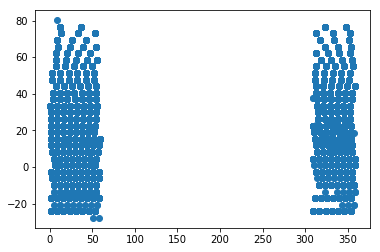

In [74]:
plt.scatter(summary['fieldRAdeg'][m1], summary['fieldDecdeg'][m1])

In [26]:
from ztfquery import query
zquery = query.ZTFQuery()

In [27]:
zquery.load_metadata(radec=[276.107960, +44.130398], size=0.0001)
#zquery.load_metadata(kind="ref",radec=[276.107960, +44.130398], size=0.0001)
#zquery.load_metadata(radec=[351.59431, +0.95])


No irsa account setup, please provide it
Enter your irsa login: suberlak@uw.edu
········


In [28]:
zquery.metatable[["field","filtercode", "ccdid","qid"]]

,field,filtercode,ccdid,qid
0,764,zg,1,3
1,764,zr,1,3
2,764,zg,1,3
3,764,zr,1,3
4,764,zg,1,3
5,764,zg,1,3
6,764,zg,1,3
7,764,zg,1,3
8,764,zr,1,3
9,764,zr,1,3


In [25]:
from ztfquery import query
zquery = query.ZTFQuery()
zquery.load_metadata(kind="ref",radec=[276.107960, +44.130398], size=0.0001)


,field,filtercode,ccdid,qid


In [24]:
zquery.metatable[["field","filtercode", "ccdid","qid"]]

,field,filtercode,ccdid,qid


In [20]:
zquery.load_metadata(radec=[276.107960,+44.130398], size=0.01, sql_query="seeing<2 and obsjd>2458252.5")

In [21]:
zquery.metatable[["obsjd", "seeing", "filtercode"]]

,obsjd,seeing,filtercode
